<a href="https://colab.research.google.com/github/DajeanArcila/biblioteca_pandas/blob/main/ejercicio_imagen_reconocer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

#ejemplooooo
person1={
    /content/20240721_160248.jpg
    /content/20240721_160253.jpg
    /content/20240721_160259.jpg
    /content/20240721_160306.jpg
    /content/20240721_160310.jpg
    /content/20240721_160315.jpg
  }
  person2/
    /content/20240721_160315.jpg
    /content/20240721_160310.jpg
    /content/20240721_160306.jpg
    /content/20240721_160259.jpg
    /content/20240721_160253.jpg
    /content/20240721_160248.jpg
    ...
  person10/
    /content/20240721_160315.jpg
    /content/20240721_160310.jpg
    /content/20240721_160306.jpg
    /content/20240721_160259.jpg
    /content/20240721_160253.jpg
    /content/20240721_160248.jpg


SyntaxError: invalid imaginary literal (<ipython-input-6-ae80338b4032>, line 3)

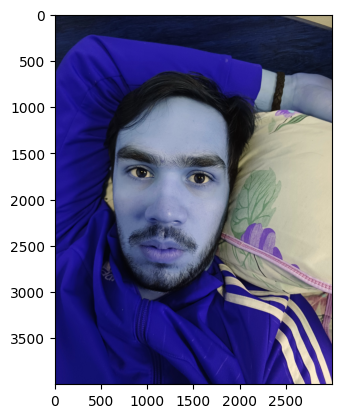

In [11]:
import cv2
import matplotlib.pyplot as plt
path = "/content/20240721_155916.jpg"
img = cv2.imread(path)

plt.imshow(img)

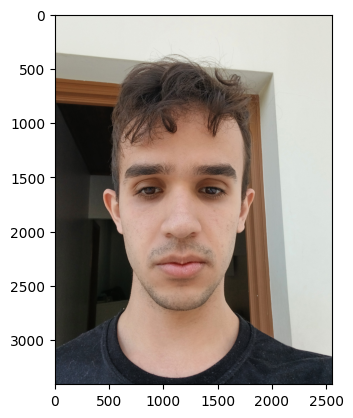

In [15]:
import cv2
import matplotlib.pyplot as plt
path = "/content/20240721_160248.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [2]:
!pip install opencv-python-headless dlib

In [ ]:
import cv2
import dlib
import os
import numpy as np

In [ ]:
# Ruta a los datos y al detector de rostros
data_path = 'data/'
detector = dlib.get_frontal_face_detector()

# Crear una carpeta para las imágenes preprocesadas
preprocessed_data_path = 'preprocessed_data/'
os.makedirs(preprocessed_data_path, exist_ok=True)

In [ ]:
import matplotlib.pyplot as plt

# Mostrar algunas imágenes de entrenamiento
batch = next(train_data)
images, labels = batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(train_data.class_indices)  # Puedes ajustar esto para mostrar las etiquetas
    plt.axis('off')
plt.show()


NameError: name 'train_data' is not defined

In [ ]:
# Función para preprocesar imágenes
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    if len(faces) > 0:
        x, y, w, h = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()
        face = img[y:y+h, x:x+w]
        face = cv2.resize(face, (224, 224))
        return face
    return None

# Preprocesar todas las imágenes y guardarlas
for person in os.listdir(data_path):
    person_path = os.path.join(data_path, person)
    preprocessed_person_path = os.path.join(preprocessed_data_path, person)
    os.makedirs(preprocessed_person_path, exist_ok=True)
    for image_name in os.listdir(person_path):
        image_path = os.path.join(person_path, image_name)
        preprocessed_image = preprocess_image(image_path)
        if preprocessed_image is not None:
            cv2.imwrite(os.path.join(preprocessed_person_path, image_name), preprocessed_image)

In [ ]:
import cv2
import face_recognition
import numpy as np
import pickle

# Cargar embeddings guardados
with open('face_embeddings.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)

# Crear listas de embeddings y etiquetas
known_face_encodings = []
known_face_names = []

for name, embeddings in embeddings_dict.items():
    for embedding in embeddings:
        known_face_encodings.append(embedding)
        known_face_names.append(name)

# Capturar video desde la cámara
video_capture = cv2.VideoCapture(0)

while True:
    # Capturar un solo frame de video
    ret, frame = video_capture.read()

    # Convertir la imagen de BGR (OpenCV) a RGB (face_recognition)
    rgb_frame = frame[:, :, ::-1]

    # Encontrar todas las ubicaciones de caras y sus codificaciones en el frame
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    # Recorrer cada cara encontrada en el frame
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Comparar la cara con nuestras caras conocidas
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Persona no identificada"

        # Si se encontró un match, usar el primero
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        # Dibujar un cuadro alrededor de la cara
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Dibujar el nombre debajo de la cara
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Mostrar el frame resultante
    cv2.imshow('Video', frame)

    # Salir del loop con la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar el handle de la cámara
video_capture.release()
cv2.destroyAllWindows()


Resumen de Pasos
Recolectar y Preprocesar Imágenes: Asegúrate de tener imágenes bien organizadas y preprocesadas.
Entrenar y Guardar Embeddings: Utiliza face_recognition para extraer y guardar embeddings faciales.
Capturar Video y Reconocer Rostros: Carga los embeddings guardados y usa opencv para capturar video en tiempo real y reconocer rostros.
Este flujo te permitirá construir un modelo de reconocimiento facial funcional y usarlo para identificar personas en tiempo real desde la cámara.